In [1]:
from keras.layers import Input, Dense, Conv2D, Flatten, Reshape, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import backend as K
from keras.callbacks import Callback
import tensorflow as tf
from tensorflow.keras.backend import clear_session

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
import cv2

In [2]:
import random

seed = 42

# Python's built-in random library
random.seed(seed)

# Scikit-learn (only affects some parts of scikit-learn)
from sklearn.utils import check_random_state
check_random_state(seed)

np.random.seed(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)

In [3]:
img_rows = 168
img_cols = 168
channels = 1

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

In [4]:
# Set path for data source
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Load Diffusion/dataset/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Set the path to the folder containing saved files
load_path = "./preprocessed_data_168x168_2years"

# Load saved NumPy arrays
X_train = np.load(os.path.join(load_path, 'X_train.npy'))
X_test = np.load(os.path.join(load_path, 'X_test.npy'))
y_train = np.load(os.path.join(load_path, 'y_train.npy'))
y_test = np.load(os.path.join(load_path, 'y_test.npy'))

# Load saved Pandas DataFrames
train_data = pd.read_pickle(os.path.join(load_path, 'train_data.pkl'))
test_data = pd.read_pickle(os.path.join(load_path, 'test_data.pkl'))
metadata = pd.read_pickle(os.path.join(load_path, 'metadata.pkl'))
metadata_original = pd.read_pickle(os.path.join(load_path, 'metadata_original.pkl'))

In [6]:
def merge_dummified_columns(df, dummified_columns, new_column_name):
    """
    Merges dummified columns into a single column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the dummified columns.
        dummified_columns (list): A list of the names of the dummified columns.
        new_column_name (str): The name of the new column to create.

    Returns:
        pd.DataFrame: The DataFrame with the dummified columns merged into a single new column.
    """
    # Create a new column containing the column name where the value is 1 for each row
    df[new_column_name] = df[dummified_columns].idxmax(axis=1)

    # Drop the dummified columns
    df.drop(dummified_columns, axis=1, inplace=True)

    return df

test_metadata = metadata_original.loc[test_data.columns]

test_metadata = merge_dummified_columns(test_metadata,
                     dummified_columns=['chilledwater', 'electricity', 'gas', 'hotwater', 'steam'],
                     new_column_name='meter_type')
test_metadata = merge_dummified_columns(test_metadata,
                     dummified_columns=['Education', 'Entertainment/public assembly', 'Lodging/residential', 'Office', 'Public services'],
                     new_column_name='building_type')

test_metadata


,lat,lng,year,meter_type,building_type
electricity_Lamb_office_Caitlin_2016,51.497838,-3.186246,2016,electricity,Office
electricity_Rat_public_Kelle_2016,38.903504,-77.005349,2016,electricity,Public services
electricity_Rat_assembly_Ezequiel_2016,38.903504,-77.005349,2016,electricity,Entertainment/public assembly
electricity_Bear_assembly_Roxy_2016,37.871903,-122.260729,2016,electricity,Entertainment/public assembly
gas_Shrew_office_Rose_2017,51.499840,-0.124663,2017,gas,Office
...,...,...,...,...,...
steam_Moose_education_Omar_2016,45.421500,-75.697200,2016,steam,Education
electricity_Rat_public_Chrissy_2017,38.903504,-77.005349,2017,electricity,Public services
electricity_Hog_office_Merilyn_2016,44.978782,-93.255398,2016,electricity,Office
steam_Bull_assembly_Amalia_2016,30.267200,-97.743100,2016,steam,Entertainment/public assembly


In [7]:
model_path = "./weights_168x168"

# List all files in the directory
all_files = os.listdir(model_path)

# Filter files that contain 'cvae'
cvae_files = [file for file in all_files if "cvae_mse" in file]

for cvae_file in cvae_files:
  print(cvae_file)
  #loaded_model = load_model(os.path.join(model_path, cvae_files[-1]))

cvae_mse_epoch_1.keras
cvae_mse_epoch_2.keras
cvae_mse_epoch_3.keras
cvae_mse_epoch_4.keras
cvae_mse_epoch_5.keras
cvae_mse_epoch_6.keras
cvae_mse_epoch_7.keras
cvae_mse_epoch_8.keras
cvae_mse_epoch_9.keras
cvae_mse_epoch_10.keras
cvae_mse_epoch_11.keras
cvae_mse_epoch_12.keras
cvae_mse_epoch_13.keras
cvae_mse_epoch_14.keras
cvae_mse_epoch_15.keras
cvae_mse_epoch_16.keras
cvae_mse_epoch_17.keras
cvae_mse_epoch_18.keras
cvae_mse_epoch_19.keras
cvae_mse_epoch_20.keras
cvae_mse_epoch_21.keras
cvae_mse_epoch_22.keras
cvae_mse_epoch_23.keras
cvae_mse_epoch_24.keras
cvae_mse_epoch_25.keras
cvae_mse_epoch_26.keras
cvae_mse_epoch_27.keras
cvae_mse_epoch_28.keras
cvae_mse_epoch_29.keras
cvae_mse_epoch_30.keras
cvae_mse_epoch_31.keras
cvae_mse_epoch_32.keras
cvae_mse_epoch_33.keras
cvae_mse_epoch_34.keras
cvae_mse_epoch_35.keras
cvae_mse_epoch_36.keras
cvae_mse_epoch_37.keras
cvae_mse_epoch_38.keras
cvae_mse_epoch_39.keras
cvae_mse_epoch_40.keras
cvae_mse_epoch_41.keras
cvae_mse_epoch_42.keras
c

In [8]:
loaded_model = load_model(os.path.join(model_path, cvae_files[-1]))
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 525)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                33664     
                                                                 
 dense_4 (Dense)             (None, 56448)             3669120   
                                                                 
 reshape (Reshape)           (None, 21, 21, 128)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 42, 42, 64)        73792     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 84, 84, 32)        18464     
 Transpose)                                                

In [9]:
X_train = X_train[::3]
X_train.shape

(901, 168, 168, 1)

In [10]:
y_train = y_train[::3]
y_train.shape

(901, 13)

In [11]:
# Function to display images
def display_images(images, title):
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

cvae_mse_epoch_5.keras
29/29 [==============================] - 10s 292ms/step


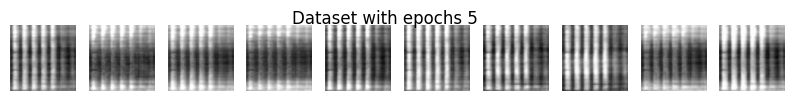

cvae_mse_epoch_10.keras
29/29 [==============================] - 10s 317ms/step


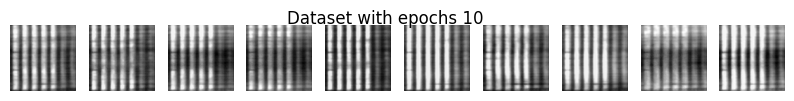

cvae_mse_epoch_15.keras
29/29 [==============================] - 8s 278ms/step


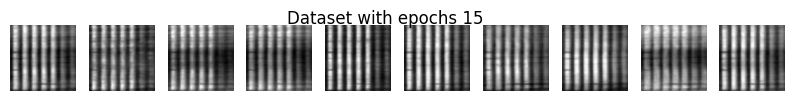

cvae_mse_epoch_20.keras
29/29 [==============================] - 8s 272ms/step


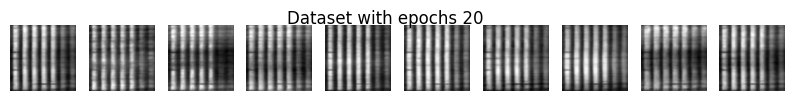

cvae_mse_epoch_25.keras
29/29 [==============================] - 10s 338ms/step


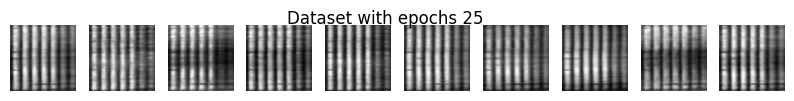

cvae_mse_epoch_30.keras
29/29 [==============================] - 10s 335ms/step


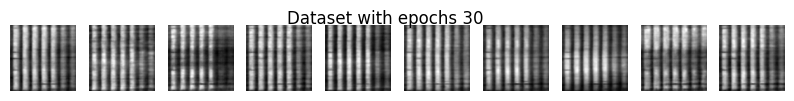

cvae_mse_epoch_35.keras
29/29 [==============================] - 10s 353ms/step


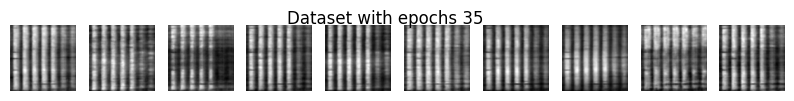

cvae_mse_epoch_40.keras
29/29 [==============================] - 9s 297ms/step


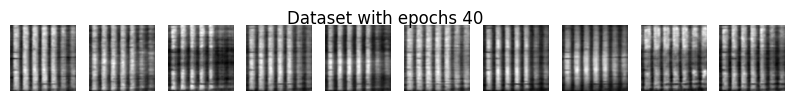

cvae_mse_epoch_45.keras
29/29 [==============================] - 8s 288ms/step


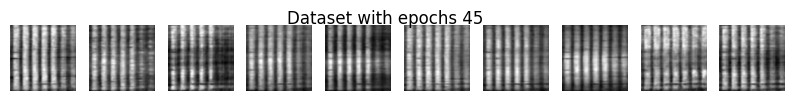

cvae_mse_epoch_50.keras
29/29 [==============================] - 10s 346ms/step


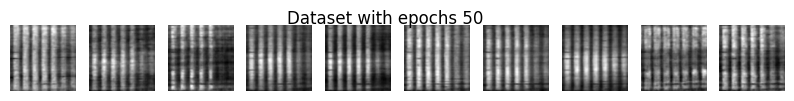

cvae_mse_epoch_55.keras
29/29 [==============================] - 10s 329ms/step


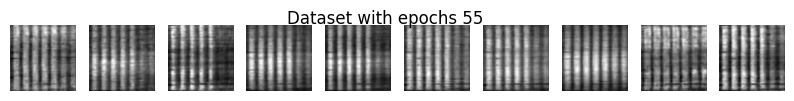

cvae_mse_epoch_60.keras
29/29 [==============================] - 9s 292ms/step


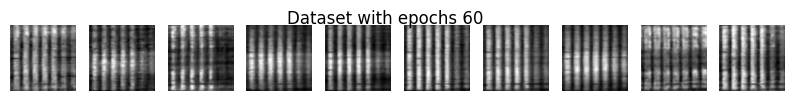

cvae_mse_epoch_65.keras
29/29 [==============================] - 9s 313ms/step


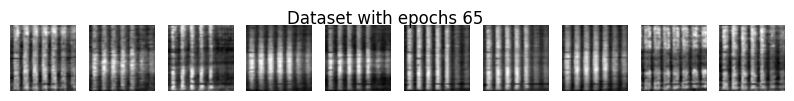

cvae_mse_epoch_70.keras
29/29 [==============================] - 10s 344ms/step


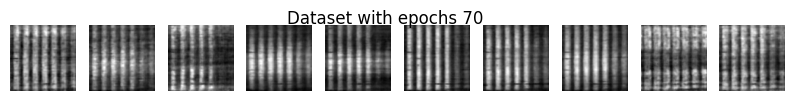

cvae_mse_epoch_75.keras
29/29 [==============================] - 10s 345ms/step


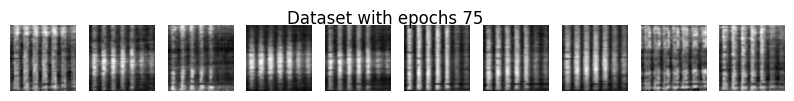

cvae_mse_epoch_80.keras
29/29 [==============================] - 9s 291ms/step


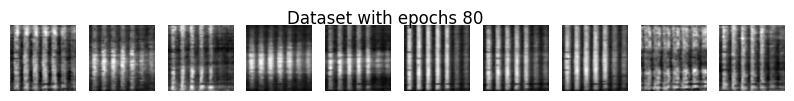

cvae_mse_epoch_85.keras
29/29 [==============================] - 8s 288ms/step


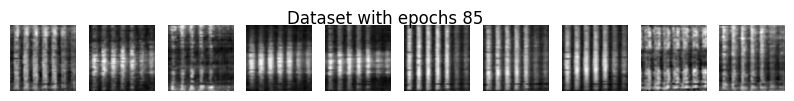

cvae_mse_epoch_90.keras
29/29 [==============================] - 10s 346ms/step


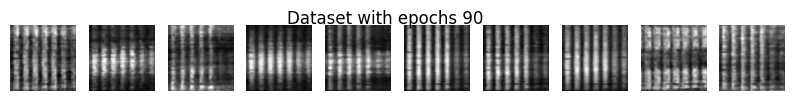

cvae_mse_epoch_95.keras
29/29 [==============================] - 12s 408ms/step


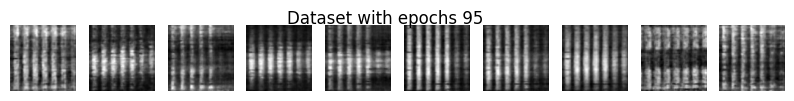

cvae_mse_epoch_100.keras
29/29 [==============================] - 10s 340ms/step


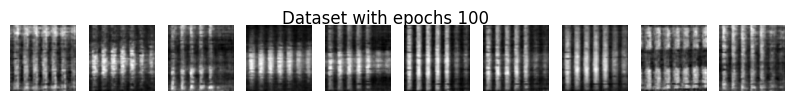

In [12]:
# Create a directory to save the generated image datasets
generation_path = "./generation/CVAE_mse_168x168"
if not os.path.exists(generation_path):
    os.makedirs(generation_path)

labels_to_condition = y_train  # This assumes you have already prepared y_train

# Loop to create 30 different datasets
for i in range(5, 100+1, 5):
    model_file = 'cvae_mse_epoch_'+str(int(i))+'.keras'
    print(model_file)
    loaded_model = load_model(os.path.join(model_path, model_file))

    np.random.seed(1)  # Set the random seed

    # Sample random points in the latent space
    random_latent_points = np.random.normal(size=(labels_to_condition.shape[0], 512))

    # Concatenate the latent points with the one-hot encoded labels
    latent_and_labels = np.concatenate([random_latent_points, labels_to_condition], axis=1)

    # Assuming the model is loaded into loaded_model
    generated_images = loaded_model.predict(latent_and_labels)

    # Show the first 10 images of the generated dataset
    display_images(generated_images, title=f"Dataset with epochs {i}")

    # Save the dataset
    np.save(os.path.join(generation_path, f"generated_epochs_{i}_train.npy"), generated_images)

cvae_mse_epoch_5.keras
29/29 [==============================] - 9s 284ms/step


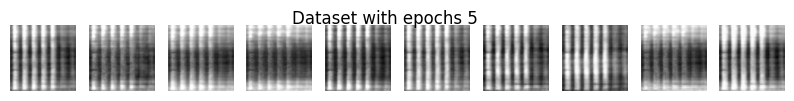

cvae_mse_epoch_10.keras
29/29 [==============================] - 8s 281ms/step


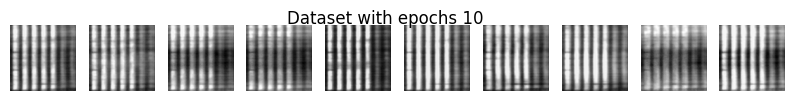

cvae_mse_epoch_15.keras
29/29 [==============================] - 10s 331ms/step


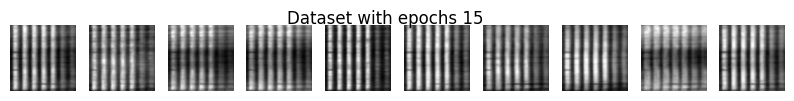

cvae_mse_epoch_20.keras
29/29 [==============================] - 10s 337ms/step


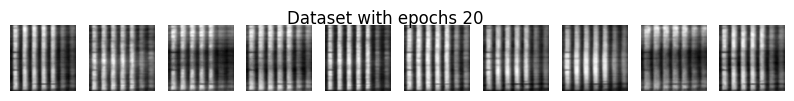

cvae_mse_epoch_25.keras
29/29 [==============================] - 10s 334ms/step


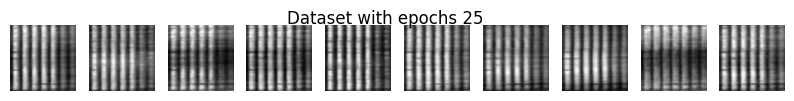

cvae_mse_epoch_30.keras
29/29 [==============================] - 10s 337ms/step


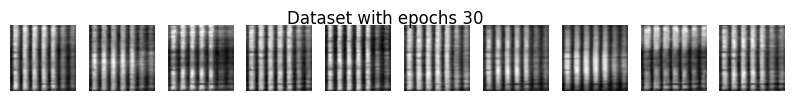

cvae_mse_epoch_35.keras
29/29 [==============================] - 10s 331ms/step


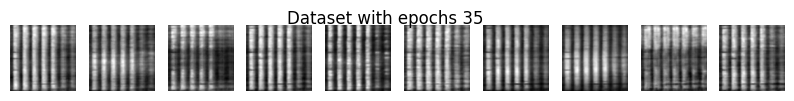

cvae_mse_epoch_40.keras
29/29 [==============================] - 10s 335ms/step


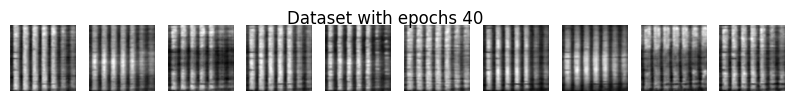

cvae_mse_epoch_45.keras
29/29 [==============================] - 9s 307ms/step


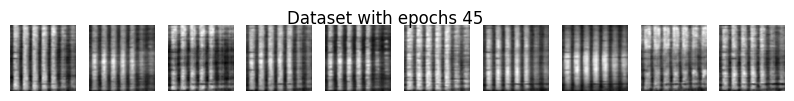

cvae_mse_epoch_50.keras
29/29 [==============================] - 9s 311ms/step


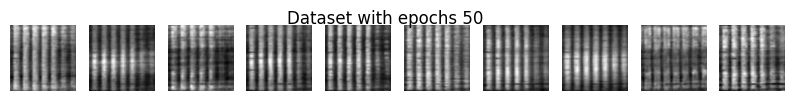

cvae_mse_epoch_55.keras
29/29 [==============================] - 9s 295ms/step


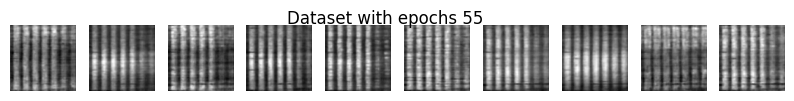

cvae_mse_epoch_60.keras
29/29 [==============================] - 8s 285ms/step


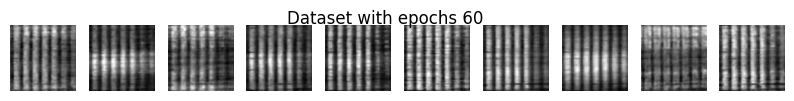

cvae_mse_epoch_65.keras
29/29 [==============================] - 8s 284ms/step


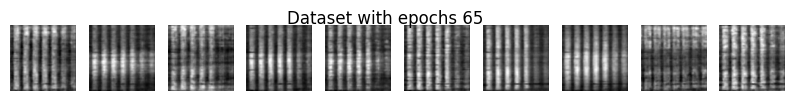

cvae_mse_epoch_70.keras
29/29 [==============================] - 9s 313ms/step


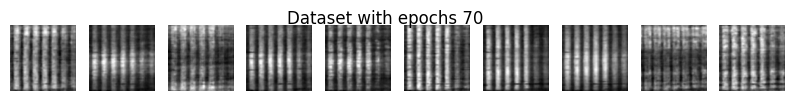

cvae_mse_epoch_75.keras
29/29 [==============================] - 10s 329ms/step


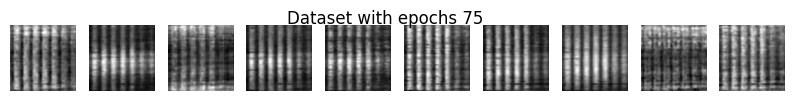

cvae_mse_epoch_80.keras
29/29 [==============================] - 10s 320ms/step


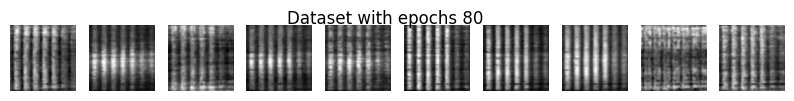

cvae_mse_epoch_85.keras
29/29 [==============================] - 9s 306ms/step


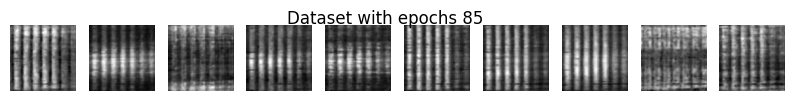

cvae_mse_epoch_90.keras
29/29 [==============================] - 11s 359ms/step


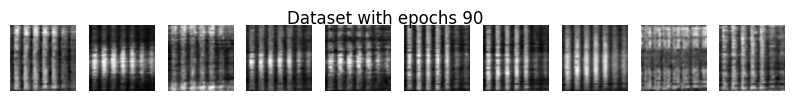

cvae_mse_epoch_95.keras
29/29 [==============================] - 10s 345ms/step


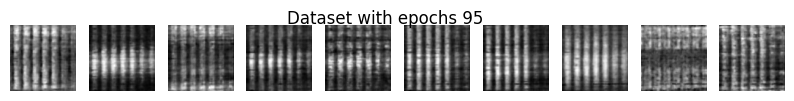

cvae_mse_epoch_100.keras
29/29 [==============================] - 10s 348ms/step


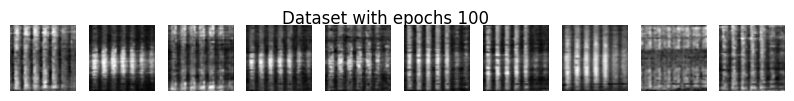

In [ ]:
# Create a directory to save the generated image datasets
generation_path = "./generation/CVAE_mse_168x168"
if not os.path.exists(generation_path):
    os.makedirs(generation_path)

labels_to_condition = y_test  # This assumes you have already prepared y_test

# Loop to create 30 different datasets
for i in range(5, 100+1, 5):
    model_file = 'cvae_mse_epoch_'+str(int(i))+'.keras'
    print(model_file)
    loaded_model = load_model(os.path.join(model_path, model_file))

    np.random.seed(1)  # Set the random seed

    # Sample random points in the latent space
    random_latent_points = np.random.normal(size=(labels_to_condition.shape[0], 512))

    # Concatenate the latent points with the one-hot encoded labels
    latent_and_labels = np.concatenate([random_latent_points, labels_to_condition], axis=1)

    # Assuming the model is loaded into loaded_model
    generated_images = loaded_model.predict(latent_and_labels)

    # Show the first 10 images of the generated dataset
    display_images(generated_images, title=f"Dataset with epochs {i}")

    # Save the dataset
    np.save(os.path.join(generation_path, f"generated_epochs_{i}.npy"), generated_images)


    # Cleanup
    #del loaded_model  # Delete the model object
    #clear_session()  # Clear the TensorFlow session to free up resources

In [ ]:
# Create a directory to save the generated image datasets
model_path = "./generation/CVAE_mse_168x168"
if not os.path.exists(model_path):
    os.makedirs(model_path)

labels_to_condition = y_test  # This assumes you have already prepared y_test

# Loop to create 30 different datasets
for i in range(1, 31):
    np.random.seed(i)  # Set the random seed

    # Sample random points in the latent space
    random_latent_points = np.random.normal(size=(labels_to_condition.shape[0], 512))

    # Concatenate the latent points with the one-hot encoded labels
    latent_and_labels = np.concatenate([random_latent_points, labels_to_condition], axis=1)

    # Assuming the model is loaded into loaded_model
    generated_images = loaded_model.predict(latent_and_labels)

    # Show the first 10 images of the generated dataset
    display_images(generated_images, title=f"Dataset with Seed {i}")

    # Save the dataset
    np.save(os.path.join(model_path, f"generated_images_seed_{i}.npy"), generated_images)

Output hidden; open in https://colab.research.google.com to view.